In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [24]:
%matplotlib inline
plt.style.use('fivethirtyeight')

In [25]:
df = pd.read_csv('Recon Ping Sweep.csv')
df

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Attack Name,Label
0,10.0.0.8-10.0.0.254-43083-1883-6,10.0.0.8,43083,10.0.0.254,1883,6,07/09/2023 01:50:33 PM,24996069,6,6,...,2494744.50,3.527978e+06,4989402.0,87.0,5005931.0,2358.908222,5007599.0,5004263.0,Recon Ping Sweep,1
1,10.0.0.1-10.0.0.254-43839-1883-6,10.0.0.1,43839,10.0.0.254,1883,6,07/09/2023 01:50:48 PM,17,1,1,...,0.00,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,Recon Ping Sweep,1
2,10.0.0.6-10.0.0.254-35017-1883-6,10.0.0.6,35017,10.0.0.254,1883,6,07/09/2023 01:50:38 PM,19988742,3,3,...,89.50,7.071068e-01,90.0,89.0,9994269.0,562.856998,9994667.0,9993871.0,Recon Ping Sweep,1
3,192.168.137.174-64.233.181.206-43128-443-6,192.168.137.174,43128,64.233.181.206,443,6,07/09/2023 01:50:37 PM,20270819,4,3,...,336447.00,0.000000e+00,336447.0,336447.0,14717373.0,0.000000,14717373.0,14717373.0,Recon Ping Sweep,1
4,192.168.137.174-34.173.20.6-34922-443-6,192.168.137.174,34922,34.173.20.6,443,6,07/09/2023 01:50:44 PM,15052965,2,1,...,336795.00,0.000000e+00,336795.0,336795.0,14716170.0,0.000000,14716170.0,14716170.0,Recon Ping Sweep,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,10.0.0.13-10.0.0.254-35153-1883-6,10.0.0.13,35153,10.0.0.254,1883,6,07/09/2023 01:49:17 PM,60005447,5,4,...,1039177.00,0.000000e+00,1039177.0,1039177.0,58963691.0,0.000000,58963691.0,58963691.0,Recon Ping Sweep,1
67,10.0.0.10-10.0.0.254-42969-1883-6,10.0.0.10,42969,10.0.0.254,1883,6,07/09/2023 01:49:17 PM,61046329,6,6,...,1046184.00,0.000000e+00,1046184.0,1046184.0,58956235.0,0.000000,58956235.0,58956235.0,Recon Ping Sweep,1
68,10.0.0.15-10.0.0.254-40499-1883-6,10.0.0.15,40499,10.0.0.254,1883,6,07/09/2023 01:49:17 PM,60004153,5,4,...,1043687.00,0.000000e+00,1043687.0,1043687.0,58958387.0,0.000000,58958387.0,58958387.0,Recon Ping Sweep,1
69,192.168.137.174-34.173.20.6-34920-443-6,192.168.137.174,34920,34.173.20.6,443,6,07/09/2023 01:49:29 PM,60412824,17,16,...,399564.25,1.249105e+05,586930.0,336995.0,14633152.5,159100.973979,14713873.0,14394505.0,Recon Ping Sweep,1


In [26]:
df = df[['Flow Duration', 'Total Length of Fwd Packet']]
df

,Flow Duration,Total Length of Fwd Packet
0,24996069,105.0
1,17,52.0
2,19988742,44.0
3,20270819,24.0
4,15052965,0.0
...,...,...
66,60005447,23.0
67,61046329,32.0
68,60004153,55.0
69,60412824,1784.0


In [27]:
df.head()

,Flow Duration,Total Length of Fwd Packet
0,24996069,105.0
1,17,52.0
2,19988742,44.0
3,20270819,24.0
4,15052965,0.0


In [28]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled

array([[-0.69066445, -0.47670851],
       [-1.49813465, -0.54069018],
       [-0.85242069, -0.55034779],
       [-0.8433085 , -0.57449182],
       [-1.01186558, -0.60346465],
       [-0.76113223, -0.60346465],
       [-0.69071378, -0.42479885],
       [-1.49813384, -0.58535663],
       [-1.48724801, -0.56604141],
       [-0.62602058, -0.33788035],
       [-0.56134153,  0.03997367],
       [-0.56133245,  1.01056355],
       [-0.72258297,  0.22950428],
       [-0.56138398,  0.08464012],
       [-1.49813384, -0.58535663],
       [-1.48722313, -0.29442111],
       [-1.48612034, -0.47550131],
       [-1.44619235, -0.43687086],
       [-0.56138407,  1.01177075],
       [-1.49813229, -0.54189738],
       [-0.56134841,  0.03876647],
       [-0.69071907, -0.42359165],
       [-0.85250426, -0.55155499],
       [-0.56134537,  0.08464012],
       [-0.59373944, -0.39099721],
       [-0.59374422, -0.39099721],
       [-0.62598873, -0.33788035],
       [-0.69066891, -0.47791571],
       [-1.01472089,

In [29]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k, max_iter=100, random_state=42, n_init=10)
    km.fit(df_scaled)
    sse.append(km.inertia_)

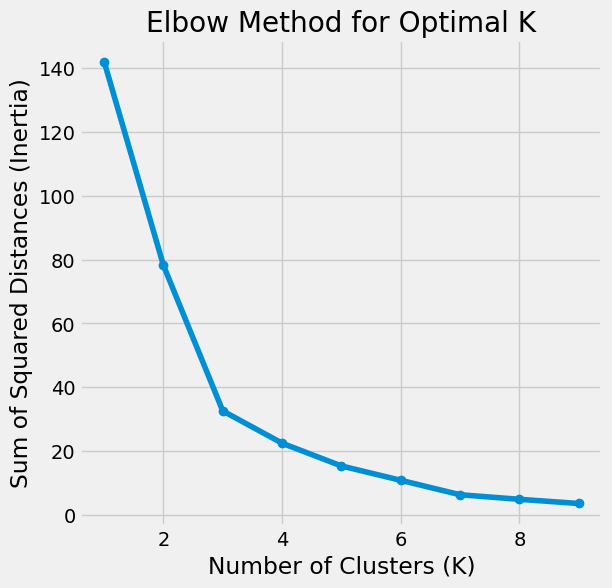

In [30]:
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

In [31]:
km = KMeans(n_clusters=5, max_iter=200, random_state=42, n_init=10)
km.fit(df_scaled)

KMeans(max_iter=200, n_clusters=5, n_init=10, random_state=42)

In [32]:
centroids = km.cluster_centers_
centroids

array([[-0.99630135, -0.4013389 ],
       [ 0.75934541, -0.33393683],
       [-0.86709353,  1.18118134],
       [ 1.24956634,  3.78350504],
       [ 1.19225191,  1.43284258]])

In [33]:
labels = km.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1,
       1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 4, 3, 1, 1, 4, 1, 1, 1, 1, 4,
       1, 1, 1, 4, 0], dtype=int32)

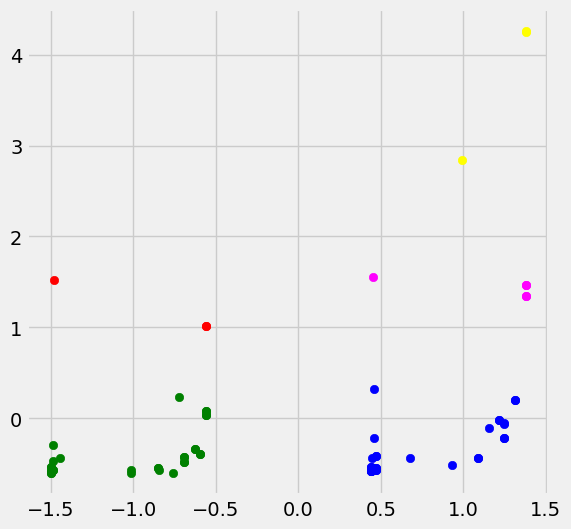

In [34]:
fig, ax = plt.subplots(figsize=(6, 6))
colors = ['green', 'blue', 'red', 'yellow', 'magenta']

for i in range(5):
    plt.scatter(df_scaled[labels == i, 0], df_scaled[labels == i, 1],
                c=colors[i], label=f'Cluster {i+1}')

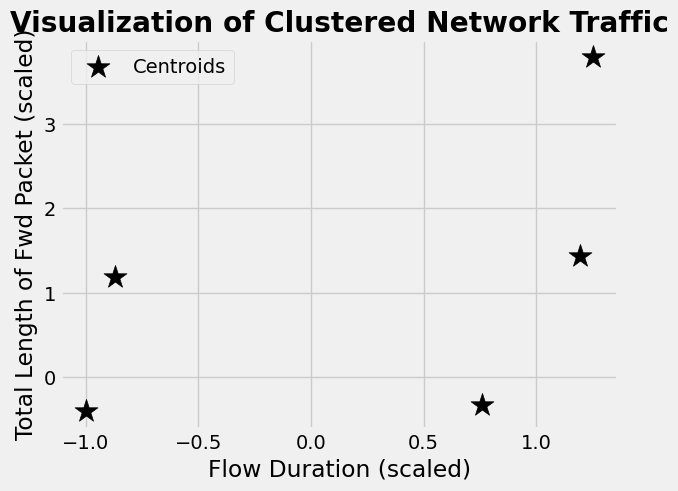

In [35]:
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='black', label='Centroids')

plt.xlabel('Flow Duration (scaled)')
plt.ylabel('Total Length of Fwd Packet (scaled)')
plt.title('Visualization of Clustered Network Traffic', fontweight='bold')
plt.legend()
ax.set_aspect('equal')
plt.grid(True)
plt.show()